### COMP SCI 464: Artificial Intelligence
### Fall 2022 Midterm 

Open the notebook using Google Colab (https://colab.research.google.com/). You can use the *upload* option on the Google Colab dialog. This notebook uses a dataset that comes with the Colab environment. Exectue the cells sequentially. You will fill in some of the missing codes of the notebook. 

Fill in the codes where you see **\### Add your code here ###**

In [1]:
# import necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn import set_config
set_config(display = 'diagram')

### [2 points] Step 1: Load the data 
Load MNIST dataset that comes with the colab environment located in the `sample_data` folder. The files do not have any headers. Load the training data into `mnist_train` and test data into `mnist_test`

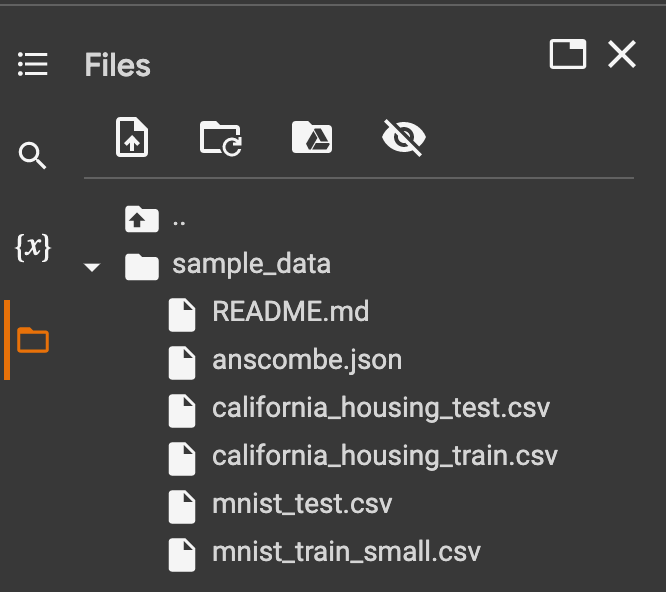 

In [49]:
### Add your code here ###
mnist_train = pd.read_csv('mnist_train_small.csv', header=None)
mnist_test = pd.read_csv('mnist_test.csv', header=None)
print("Finished loading the data files...")

Finished loading the data files...


In [50]:
# check the records to confirm the data is loaded correctly

# We can also use diplay(data_frame) function for that 
display(mnist_train)
mnist_train.head()
mnist_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,20000.000000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0
mean,4.470200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215000,0.087700,0.036500,0.013650,0.032600,0.006000,0.0,0.0,0.0,0.0
std,2.892755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314663,3.921566,2.712459,0.950794,2.718034,0.600318,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,79.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [51]:
# check the shape of the training data
print(f'Shape of the training data: {mnist_train.shape}')
print(f'Shape of the test data: {mnist_test.shape}')

Shape of the training data: (20000, 785)
Shape of the test data: (10000, 785)


As you can see in the output above, the first column has the label of the digit
and the rest of the columns contain the pixel values. 
Therefore, we need to select the features (pixel values) and the label into X and y. 

In [52]:
# One important characteristic of the dataset is that 
# the column headers are numeric
print(type(mnist_train.columns))
mnist_train.columns

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
           dtype='int64', length=785)

### [2 points] Step 2: Create Training Data and Training Labels 

- We need to use [integer-based indexing](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) to select the colums here.  

- Select the pixel values into `X_train` and labels into `y_train` 
_Hint_: use [`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) to select the columns 
- You will also need to convert them into numpy array. You can check it from [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html)  


In [115]:

### Add your code here ###
X_train = mnist_train.iloc[:, 1:].values #to_numpy()
y_train = mnist_train.iloc[:, 0].values #to_numpy()
print("X_train", X_train)
print("y_train",y_train)

X_train [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_train [6 5 7 ... 2 9 5]


### Verify the previous step 

In [116]:
# Verify that you correctly loaded the data 
# The output should be (20000, 784), (20000,)
print(f"{X_train.shape}, {y_train.shape}")


(20000, 784), (20000,)


### Check a random digit from the dataset.

Random Index: 15128
True label of the digit is 1


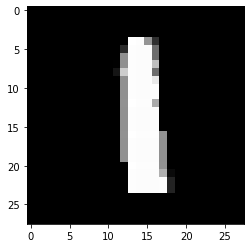

In [117]:
# Generate a random index to check a digit 
# it will generate a new index in every run
index = np.random.randint(0, X_train.shape[0], dtype=int)
print(f"Random Index: {index}")
print("True label of the digit is %s" %y_train[index])

# plot the digit 
plt.imshow(X_train[index].reshape(28, 28),
           cmap = 'gray',
           interpolation='nearest')


In [118]:
# check a data sample to see if normalization is needed. 
X_train[index]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 255, 253, 149,  47,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 253, 252, 252,
       108,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 14

### Visualizing samples from each digit

Random Index: 739

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [

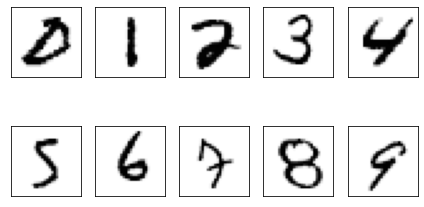

In [119]:
# We can check random samples for each digit 

random_index = np.random.randint(0, X_train.shape[1], dtype=int)
print(f"Random Index: {random_index}\n")

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    print(X_train[y_train == i])
    img = X_train[y_train == i][random_index].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Visualizing different samples of a digit

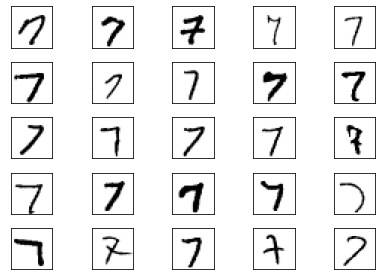

In [120]:
# We can also check samples of a digit

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
  # Change the value in y_train == <value> 
  # to check samples of a different digit 
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### [5 points] Step 3: Create a Neural Network 
Create a Multi-layer perceptron classifier (Neural Network) with the following parameters: 
 - Two hidden layers with 100 neurons in the first layer and 50 neurons in the second
 - Use 'relu' for activation
 - Set 'adaptive' learning rate 
 - Set initial learning rate to 0.001,
 - Use 'sgd' solver 
 - Set max_iter to 500,
 - Set early_stopping to True, 
 - Set verbose to True to see the progress in training
 - Set random_state to 22

In [127]:
### Add your code here ### 
classifier = MLPClassifier(hidden_layer_sizes=(100,50),activation='relu',learning_rate='adaptive',
                           learning_rate_init=0.001, solver='sgd', max_iter=500,early_stopping=True,
                          verbose=True,random_state=22)
classifier

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50),
              learning_rate='adaptive', max_iter=500, random_state=22,
              solver='sgd', verbose=True)

### [2 points] Step 4: Create a Pipeline 

Create a pipeline where 
- the first step is a `StandardScaler()` 
- the second step is the `MLPClassifier` above.  

In [128]:

### Add your code here ### 
pipe = make_pipeline(StandardScaler(),
                     classifier)

### [2 points] Step 5: Train the model 

Now train the model you created above

In [129]:
### Add your code here ### 
pipe.fit(X_train, y_train)

Iteration 1, loss = 2.02768607
Validation score: 0.559333
Iteration 2, loss = 1.31074093
Validation score: 0.726667
Iteration 3, loss = 0.89757869
Validation score: 0.796000
Iteration 4, loss = 0.67793677
Validation score: 0.836000
Iteration 5, loss = 0.55767400
Validation score: 0.860000
Iteration 6, loss = 0.48376916
Validation score: 0.874667
Iteration 7, loss = 0.43312369
Validation score: 0.886000
Iteration 8, loss = 0.39561473
Validation score: 0.891333
Iteration 9, loss = 0.36656771
Validation score: 0.893333
Iteration 10, loss = 0.34276418
Validation score: 0.895333
Iteration 11, loss = 0.32316173
Validation score: 0.898667
Iteration 12, loss = 0.30632164
Validation score: 0.898667
Iteration 13, loss = 0.29186844
Validation score: 0.901333
Iteration 14, loss = 0.27926524
Validation score: 0.903333
Iteration 15, loss = 0.26790619
Validation score: 0.904667
Iteration 16, loss = 0.25770536
Validation score: 0.908000
Iteration 17, loss = 0.24848499
Validation score: 0.908000
Iterat

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(100, 50),
                               learning_rate='adaptive', max_iter=500,
                               random_state=22, solver='sgd', verbose=True))])

### [ 2 points] Step 6: Load the test data 
Once we have the trained model, use the test data to evaluate the model performance. First, load the test data into `X_test` and and test labels into `y_test` as NumPy arrays. You can use `iloc` the same way we did for the training data.  

In [130]:

### Add your code here ###
mnist_test = pd.read_csv('mnist_test.csv', header=None)
X_test = mnist_test.iloc[:, 1:].values
y_test = mnist_test.iloc[:, 0].values
print("X_test", X_test)
print("y_test",y_test)


X_test [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_test [7 2 1 ... 4 5 6]


### [2 points] Step 7A: Evaluate the model accuracy 

Now report the accuracy of the model 

In [132]:

### Add your code here ### 
y_test_pred = pipe.predict(X_test)

acc = (np.sum(y_test == y_test_pred).astype(float)/X_test.shape[0])

print(f"Test accuracy: {acc * 100: .3f}%")

Test accuracy:  92.780%


### [3 points] Step 7B: Print the Confusion Matrix 

Print the confusion matrix of the test data as well. You can use [Scikit-Learn's Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) for that.  

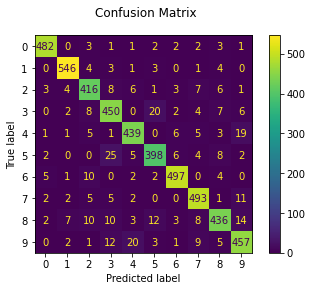

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Add your code here ###
#  new in 0.24 
predictions = pipe.predict(X_valid)
disp = ConfusionMatrixDisplay.from_predictions(y_valid, predictions)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

### [10 points] Step 8: Tuning hyperparameters 
Now let us check if we can improve the accuracy of the MLP classifier through hyperparameter tuning. This time we will only try out different activation functions. Therefore, we won't use GridSearch here. 

In [136]:
# Below are the available activation functions for MLPClassifier in scikit-learn

activations = ['identity', 'logistic', 'tanh', 'relu']


# A list to save the accuracies of different activation functions 
accuracies = []

# Inside the loop put the activation function to create an MLPClassifier
# with the same parameter as above, train it using the training 
# data, and then predict the labels for the test data. 

for activation_function in activations:
  
  ### Your code here ### 
  #   create a pipeline with StandardScaler() and an MLP Classifier 
  #   with the same parameters specified above.     
  #   train it using the training data    
  #   calculate the accuracy using the test data and save it to `acc` below
    classifier = MLPClassifier(hidden_layer_sizes=(100,50),activation=activation_function,learning_rate='adaptive',
                           learning_rate_init=0.001, solver='sgd', max_iter=500,early_stopping=True,
                          verbose=True,random_state=22)
    pipe = make_pipeline(StandardScaler(),
                     classifier)
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)

    acc = (np.sum(y_test == y_test_pred).astype(float)/X_test.shape[0])
    print("The model with %s activation has an accuracy of %s" %(activation_function, acc))
    # save the prediction accuracy in the accuracies[] list
    accuracies.append(acc)


Iteration 1, loss = 1.35682952
Validation score: 0.797333
Iteration 2, loss = 0.59685524
Validation score: 0.856667
Iteration 3, loss = 0.48529678
Validation score: 0.871333
Iteration 4, loss = 0.42860352
Validation score: 0.880000
Iteration 5, loss = 0.39345304
Validation score: 0.886000
Iteration 6, loss = 0.36789117
Validation score: 0.889333
Iteration 7, loss = 0.34876714
Validation score: 0.892000
Iteration 8, loss = 0.33391356
Validation score: 0.892667
Iteration 9, loss = 0.32211892
Validation score: 0.894000
Iteration 10, loss = 0.31243304
Validation score: 0.895333
Iteration 11, loss = 0.30435078
Validation score: 0.899333
Iteration 12, loss = 0.29753303
Validation score: 0.899333
Iteration 13, loss = 0.29117346
Validation score: 0.900000
Iteration 14, loss = 0.28597633
Validation score: 0.900000
Iteration 15, loss = 0.28103256
Validation score: 0.900667
Iteration 16, loss = 0.27657948
Validation score: 0.899333
Iteration 17, loss = 0.27280438
Validation score: 0.900000
Iterat

Now we can check which activation produced the best accuracy in the test data. 

In [137]:
# print the accuracy for each activation
for activation_function, accuracy in zip(activations, accuracies):
  print(f"With {activation_function} activation, the accuracy is {accuracy}")

# print the activation that produced the best accuracy here
print(f"\nThe best accuracy was for {activations[np.argmax(accuracies)]} activation'")    

With identity activation, the accuracy is 0.9096
With logistic activation, the accuracy is 0.9003
With tanh activation, the accuracy is 0.9299
With relu activation, the accuracy is 0.9278

The best accuracy was for tanh activation'


### [2 points] Optional Feedback

Share your experience of taking this test below. This is an optional question. 

***Add your feedback here (double-click the cell and edit)***
From the tuning I can see that using activation 'relu' gives the best accuracy of 0.9278
The test was interesting and not very difficult. Tuning without using GridSearch was a bit confusing for a second.